In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
#Задание 1

In [4]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Задание 2

In [6]:
mean_sl = hr['satisfaction_level'].mean()
median_sl = hr['satisfaction_level'].median()
mode_sl = hr['satisfaction_level'].mode()[0]
min_sl = hr['satisfaction_level'].min()
max_sl = hr['satisfaction_level'].max()
std_sl = hr['satisfaction_level'].std()
print(mean_sl, median_sl, mode_sl, min_sl, max_sl, std_sl, sep='\n')

0.6128335222348156
0.64
0.1
0.09
1.0
0.2486306510611418


In [7]:
mean_le = hr['last_evaluation'].mean()
median_le = hr['last_evaluation'].median()
mode_le = hr['last_evaluation'].mode()[0]
min_le = hr['last_evaluation'].min()
max_le = hr['last_evaluation'].max()
std_le = hr['last_evaluation'].std()
print(mean_le, median_le, mode_le, min_le, max_le, std_le, sep='\n')

0.7161017401160078
0.72
0.55
0.36
1.0
0.17116911062327592


In [8]:
mean_np = hr['number_project'].mean()
median_np = hr['number_project'].median()
mode_np = hr['number_project'].mode()[0]
min_np = hr['number_project'].min()
max_np = hr['number_project'].max()
std_np = hr['number_project'].std()
print(mean_np, median_np, mode_np, min_np, max_np, std_np, sep='\n')

3.80305353690246
4.0
4
2
7
1.2325923553183857


In [9]:
mean_amh = hr['average_montly_hours'].mean()
median_amh = hr['average_montly_hours'].median()
mode_amh = hr['average_montly_hours'].mode()[0]
min_amh = hr['average_montly_hours'].min()
max_amh = hr['average_montly_hours'].max()
std_amh = hr['average_montly_hours'].std()
print(mean_amh, median_amh, mode_amh, min_amh, max_amh, std_amh, sep='\n')

201.0503366891126
200.0
135
96
310
49.943099371284305


In [10]:
mode_wa = hr['Work_accident'].mode()[0]
mode_l = hr['left'].mode()[0]
mode_ply = hr['promotion_last_5years'].mode()[0]
mode_d = hr['department'].mode()[0]
mode_s = hr['salary'].mode()[0]
print(mode_wa, mode_l, mode_ply, mode_d, mode_s, sep='\n')

0
0
0
sales
low


In [11]:
#Задание 3

In [12]:
columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
correlation_matrix = hr[columns].corr()
print(correlation_matrix)

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


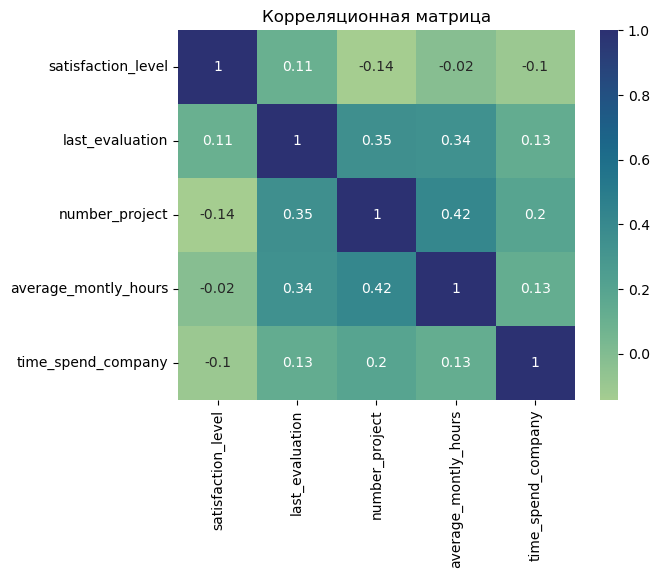

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Корреляционная матрица')
plt.show()

In [14]:
#Задание 4

In [15]:
departments_grouped = hr['department'].value_counts()
print(departments_grouped)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


In [16]:
#Задание 5

In [17]:
salary_distribution = hr['salary'].value_counts()
print(salary_distribution)

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


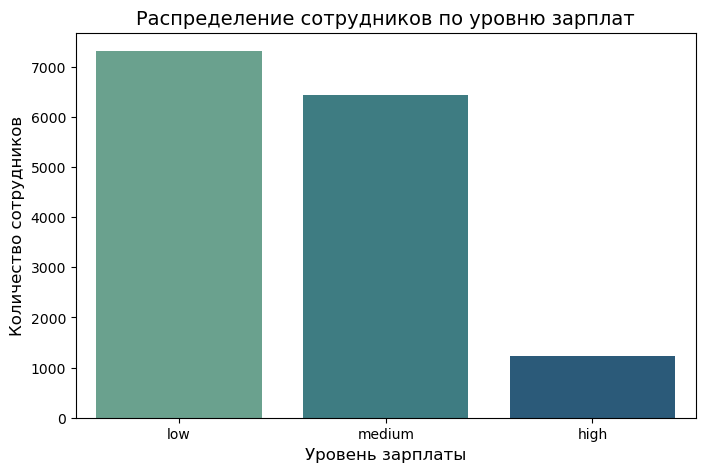

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=hr, x='salary', hue='salary', order=['low', 'medium', 'high'], palette='crest', legend=False)
plt.title('Распределение сотрудников по уровню зарплат', fontsize=14)
plt.xlabel('Уровень зарплаты', fontsize=12)
plt.ylabel('Количество сотрудников', fontsize=12)
plt.show()

In [19]:
#Задание 6

In [20]:
grouped= hr.groupby('department')['salary'].value_counts()
print(grouped)

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: count, dtype: int64


Text(0.5, 1.02, 'Распределение зарплат по департаментам')

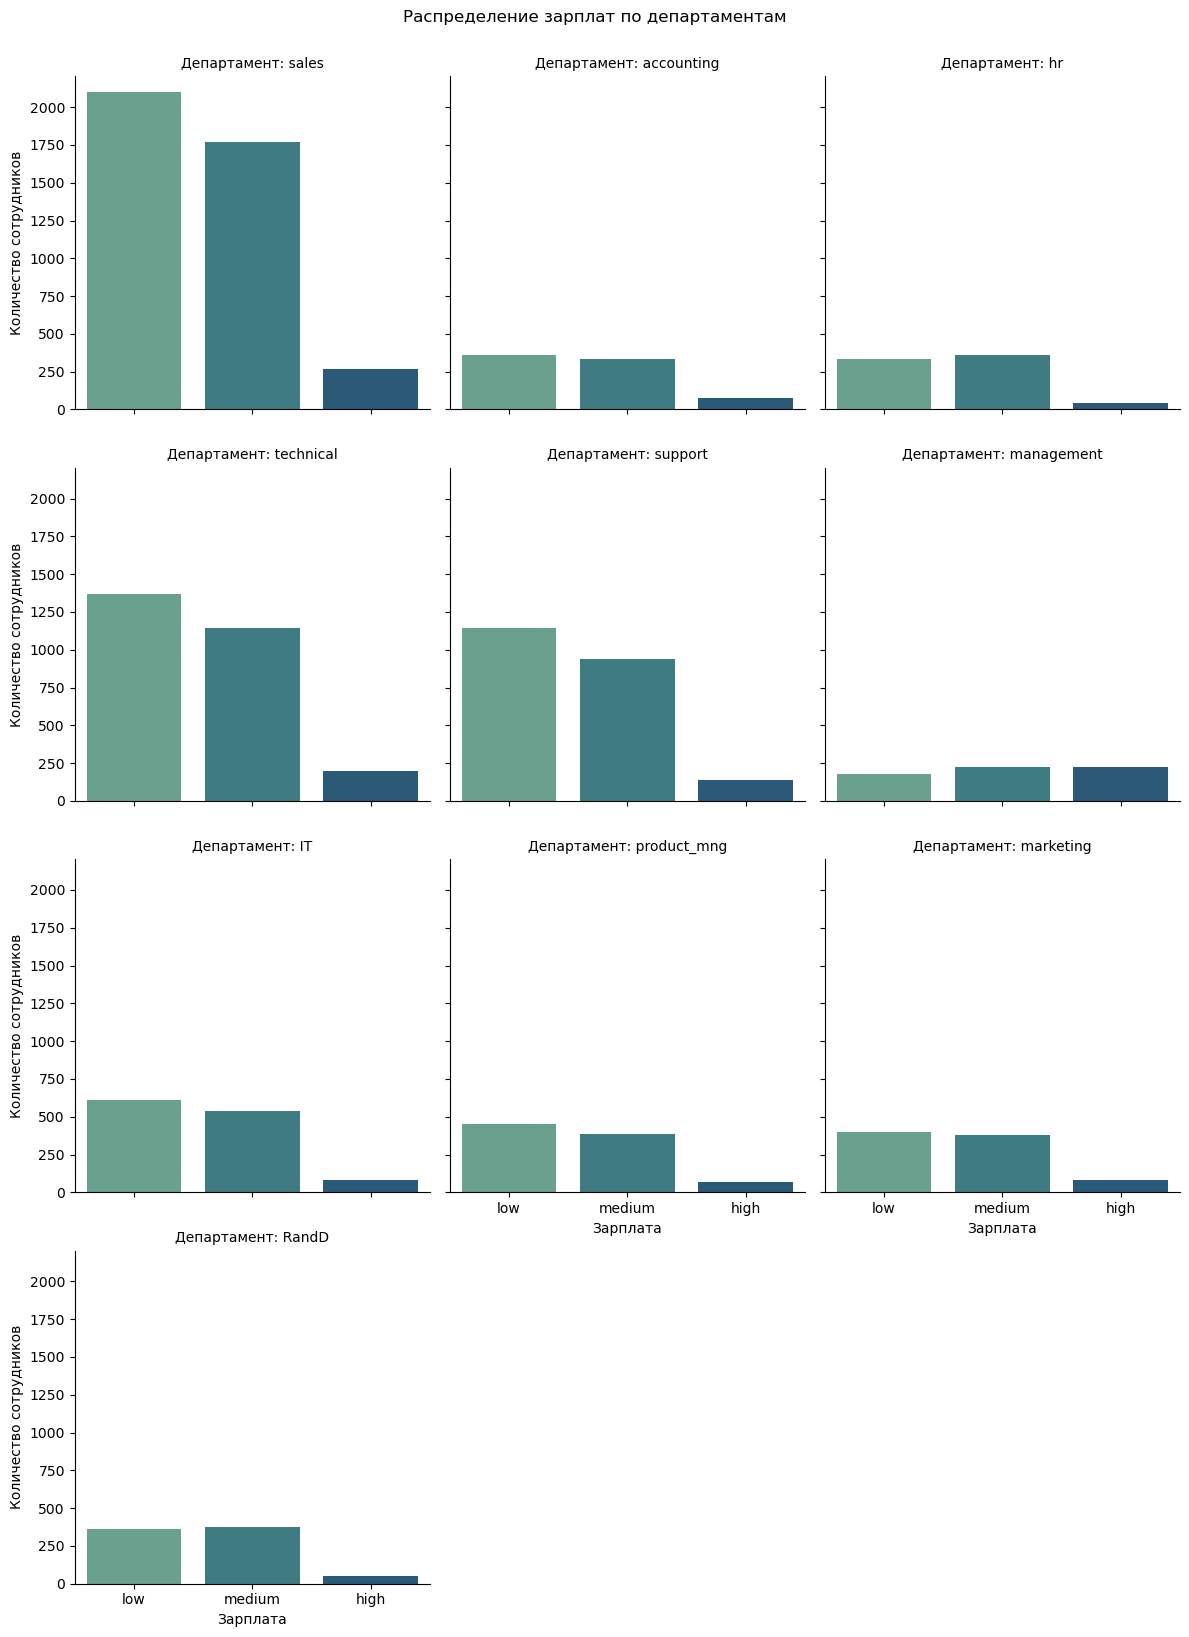

In [21]:
department_salary = sns.catplot(
    data=hr,
    x='salary',
    hue='salary',  
    col='department',
    col_wrap=3,    
    kind='count',
    palette='crest',
    order=['low', 'medium', 'high'],
    height=4,
    aspect=1,
    legend=False
)

department_salary.set_titles('Департамент: {col_name}')
department_salary.set_axis_labels('Зарплата', 'Количество сотрудников')
plt.suptitle('Распределение зарплат по департаментам', y=1.02)

In [22]:
#Задание 7

In [23]:
high_salary = hr[hr['salary'] == 'high']['average_montly_hours']
low_salary = hr[hr['salary'] == 'low']['average_montly_hours']

In [24]:
def shapiro_test(data, alpha = 0.05):
    stat, p = shapiro(data)
    if p > alpha:
        print('Распределение похоже на нормальное')
    else:
        print('Распределение не похоже на нормальное')


In [25]:
shapiro_test (high_salary)

Распределение не похоже на нормальное


In [26]:
shapiro_test (low_salary)

Распределение не похоже на нормальное


In [27]:
u_stat, p_mannwhitney = stats.mannwhitneyu(high_salary, low_salary, alternative='greater')
print(f"U-статистика = {u_stat}, p-value = {p_mannwhitney:.3f}")

U-статистика = 4507096.5, p-value = 0.588


In [28]:
alpha = 0.05
if p_mannwhitney < alpha:
    print("\n Отвергаем H0: Сотрудники с высоким окладом работают больше.")
else:
    print("\n Не отвергаем H0: Нет доказательств, что cотрудники с высоким окладом работают больше.")


 Не отвергаем H0: Нет доказательств, что cотрудники с высоким окладом работают больше.


In [29]:
#Задание 8

In [30]:
status_grouped = hr.groupby('left')

In [31]:
results = status_grouped.agg({
    'promotion_last_5years': lambda x: x.mean(), 
    'satisfaction_level': 'mean',                
    'number_project': 'mean'
})

In [32]:
print(results)

      promotion_last_5years  satisfaction_level  number_project
left                                                           
0                  0.026251            0.666810        3.786664
1                  0.005321            0.440098        3.855503


In [33]:
#Задание 8

In [34]:
x = hr.drop(['left', 'department', 'salary'], axis=1)
y = hr['left']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [39]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7557777777777778
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.48      0.25      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

